<a href="https://colab.research.google.com/github/wanjas1/Sentiment-Analysis-and-Predictive-Modeling-of-Weight-Loss-Medication-Reviews/blob/main/Sentiment_Analysis_and_Predictive_Modeling_of_Weight_Loss_Medication_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.0 Prerequisite Code

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import html
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud


## 1.1 Problem Definition & Statement

### Problem Statement

Many people who suffer from obesity rely on weight loss medication to improve their health. The effectiveness of these medications vary, with different side effects and user experiences, which creates a challenge for pharmaceutical companies, health professionals and customers. Low customer satisfaction can decrease the sales and growth potential of pharmaceutical companies. Also, health professionals may struggle when it comes to recommending drugs to customers depending on their individual experiences. Moreover, some customers spend so much money on medications that may not be beneficial to them or even worsen their condition. Hence, it is important to analyze and predict customer satisfaction ratings to identify patterns that likely lead to positive or negative customer experieces.
The goal of this project is to uncover these insights to guide pharmaceutical companies to improve their products, help health workers in prescribing appropriate drugs and also help consumers understand other people's experience with a particular medication before making a purchase. Ratings serve as a key indicator of customer satisfaction with the product.

### Who It Affects

- **Customers**: Depend on ratings and reviews to make informed decisions about choosing the right medication.  
- **Pharmaceutical Companies**: Use customer feedback to enhance product quality and services.  
- **Healthcare Providers**: Leverage insights to recommend the most effective treatments to patients.  

### Financial and Social Implications

- **Financial**: Companies that address low ratings will be able to identify the weaknesses of their product offerings so they can improve upon them, thereby fostering customer loyalty and satisfaction and increasing sales. On the other hand, neglecting negative reviews may harm their reputation because ignoring recurring issues with their product can lead to lawsuits and product recalls.  
- **Social**: Unhappy customers may stop using the medication, potentially compromising their health. Accurately predicting and addressing low ratings can improve public trust and lead to better health outcomes.  

### Model Usage

 Building a model to analyze large volumes of customer review data can help identify key factors influencing customer satisfaction. By doing so:  

- Companies can track trends in customer satisfaction over time, identify common side effects and overall user experience.
- Early detection of low ratings enables prompt action to resolve complaints or enhance products.
- Health professions can leverage insights from the model to understand user experience with weight loss medication so they can recommend treatments that best aligns with patient needs.  
- Insights from the predictions will guide product development and marketing strategies to better align with customer needs and preferences.  
- The model can also be integrated into reveiw platforms or health apps to aid users in making personal decisions about which drugs best suits their needs

### Desired Model Performance

The model must effectively predict ratings, with a focus on identifying negative reviews or ratings to pinpoint the cause of dissatisfaction with the medication. Performance metrics like recall, precision and precision/ recall AUC are very important as they help us determine how accurate a model is in identifying especially negative reviews and whether a model is able to distinguish between the classes regardless of class imbalance, hence the model should be able to produce good scores across these metrics. A strong balance between precision and recall is essential, targeting an F1 score above 0.8 to ensure reliable and actionable predictions.

<hr>
<br>

## 1.2 Data: Cleansing and Preprocessing


In [20]:
from google.colab import files
uploaded = files.upload()



weightloss_data = pd.read_csv('weightloss.csv')

Saving weightloss.csv to weightloss (1).csv


In [21]:
weightloss_data.info()
missing_data_summary = weightloss_data.isnull().sum()
print(missing_data_summary)                               #there are no missing values in the data so there is no need to drop any records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rev_ID       2437 non-null   int64 
 1   drugName     2437 non-null   object
 2   condition    2437 non-null   object
 3   review       2437 non-null   object
 4   rating       2437 non-null   int64 
 5   date         2437 non-null   int64 
 6   usefulCount  2437 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 133.4+ KB
rev_ID         0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64


In [22]:
weightloss_data.head(15)    # there are some special unwanted characters in the review column which have to be cleaned (eg row 5 and 13)

,rev_ID,drugName,condition,review,rating,date,usefulCount
0,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,42799,35
1,4907,Belviq,Weight Loss,"""This is a waste of money. Did not curb my ap...",1,41905,57
2,128575,Phentermine,Obesity,"""Started out yesterday at 242 and this morning...",10,42162,5
3,138742,Phentermine,Weight Loss,"""I absolutely LOVE this medicine. I lost 30 po...",9,40681,19
4,165109,Phentermine / topiramate,Obesity,"""I am 60 yo male starting weight 297lbs. Since...",10,41788,48
5,4554,Belviq,Weight Loss,"""I&#039;ve been taking it for about 6 weeks. I...",7,42459,25
6,51992,Adipex-P,Weight Loss,"""I started taking Adipex 37.5 on May 29th, my ...",8,42158,37
7,38072,Adipex-P,Weight Loss,"""These are all fake commants for sure""",1,42392,11
8,81626,Liraglutide,Weight Loss,"""Hi everyone! I started taking Saxenda 10 days...",10,42923,12
9,145518,Qsymia,Weight Loss,"""I have been on Qsymia for about 20 days and I...",10,42677,69


In [23]:
# Clean text data by Decoding HTML and removing unwanted special characters
weightloss_data['review'] = weightloss_data['review'].apply(html.unescape)
weightloss_data['review'] = weightloss_data['review'].str.replace(r'[^\w\s.,!?]', '', regex=True)

 #changing date field to a standard date format
weightloss_data['date'] = pd.to_datetime(weightloss_data['date'], origin='1899-12-30', unit='D')

In [24]:
weightloss_data.to_csv('cleaned_weightloss_data.csv', index=False)

# clean dataset
weightloss_data.head(15)

,rev_ID,drugName,condition,review,rating,date,usefulCount
0,39293,Contrave,Weight Loss,Contrave combines drugs that were used for alc...,9,2017-03-05,35
1,4907,Belviq,Weight Loss,This is a waste of money. Did not curb my app...,1,2014-09-23,57
2,128575,Phentermine,Obesity,Started out yesterday at 242 and this morning ...,10,2015-06-07,5
3,138742,Phentermine,Weight Loss,I absolutely LOVE this medicine. I lost 30 pou...,9,2011-05-18,19
4,165109,Phentermine / topiramate,Obesity,I am 60 yo male starting weight 297lbs. Since ...,10,2014-05-29,48
5,4554,Belviq,Weight Loss,Ive been taking it for about 6 weeks. Ive lost...,7,2016-03-30,25
6,51992,Adipex-P,Weight Loss,"I started taking Adipex 37.5 on May 29th, my f...",8,2015-06-03,37
7,38072,Adipex-P,Weight Loss,These are all fake commants for sure,1,2016-01-23,11
8,81626,Liraglutide,Weight Loss,Hi everyone! I started taking Saxenda 10 days ...,10,2017-07-07,12
9,145518,Qsymia,Weight Loss,I have been on Qsymia for about 20 days and I ...,10,2016-11-03,69


### Data Cleansing and Preprocessing Steps

The data preparation process includes several key steps to ensure the dataset is ready for analysis. These steps previewed the data to check for missing values, data formatting inconsistencies, and cleaning of textual data.

The code `isnull().sum()` identified and summarized the count of missing values in each column. This provided insights into the completeness of the dataset, which is crucial for deciding how to handle missing data in subsequent steps.

The `review` column underwent preprocessing to improve its quality for further text analysis. First, the text data was processed using the `html.unescape` method to decode any HTML entities, such as `&amp;` to `&`, ensuring cleaner and more readable text. Additionally, special characters, symbols, or extraneous punctuation (excluding essential elements like `.,!?`) were removed using a regex pattern. This step helps to normalize the textual data and reduce noise, making it more suitable for techniques like sentiment analysis or keyword extraction.

The dataset contains a `date` column stored in numeric format (likely as Excel serial dates). This column was converted to a standard `YYYY-MM-DD` format using `pd.to_datetime` with a specified origin (`1899-12-30`, a common reference date for Excel) and unit (`D` for days). This transformation standardized the date representation, making it easier to perform time-based analyses or visualizations.

These preprocessing steps will help to improve the dataset’s usability by addressing issues with missing values, textual inconsistencies, and date formatting. The resulting dataset is now cleaner, standardized, and ready for further exploration or modeling.

## 1.3 Data: Description & EDA





sentiment
1    1877
0     560
Name: count, dtype: int64
Percentage of positive ratings:  77.02 %
Positive label proportion:  0.7702092736971686


<Axes: >

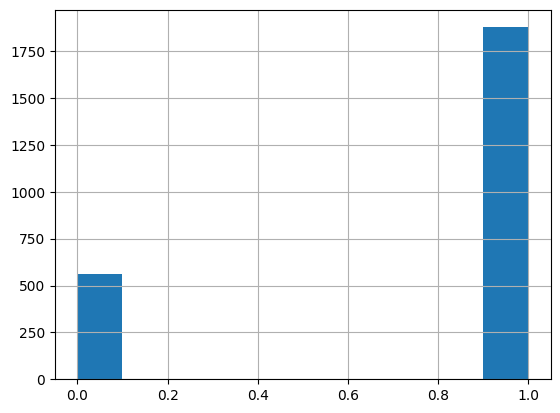

In [25]:
# creating sentiment column and converting rating values of 1-6 to 0 and 7-10 to 1
weightloss_data['sentiment'] = weightloss_data['rating'].replace({1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:1, 8:1, 9:1, 10:1})

print(weightloss_data['sentiment'].value_counts())

positive_ratio = weightloss_data['sentiment'].mean() * 100
print('Percentage of positive ratings: ', round(positive_ratio, 2), '%')

print('Positive label proportion: ', weightloss_data.sentiment.mean())

#visualizing the target variable (negative reviews = 0, positive reviews = 1)
weightloss_data.sentiment.hist()

In [26]:
# dataset overview
weightloss_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   rev_ID       2437 non-null   int64         
 1   drugName     2437 non-null   object        
 2   condition    2437 non-null   object        
 3   review       2437 non-null   object        
 4   rating       2437 non-null   int64         
 5   date         2437 non-null   datetime64[ns]
 6   usefulCount  2437 non-null   int64         
 7   sentiment    2437 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 152.4+ KB


In [27]:
# descriptive statistics for numeric variables
weightloss_data.describe().T

,count,mean,min,25%,50%,75%,max,std
rev_ID,2437.0,95082.719327,4227.0,52176.0,82119.0,138629.0,225928.0,52661.70591
rating,2437.0,7.835043,1.0,7.0,9.0,10.0,10.0,2.907841
date,2437,2015-04-27 11:02:23.290931456,2008-02-27 00:00:00,2014-08-16 00:00:00,2015-11-09 00:00:00,2016-12-05 00:00:00,2017-12-11 00:00:00,NaN
usefulCount,2437.0,38.551908,0.0,12.0,25.0,50.0,484.0,41.296948
sentiment,2437.0,0.770209,0.0,1.0,1.0,1.0,1.0,0.420785


In [28]:
# preview of the data
weightloss_data.head()

,rev_ID,drugName,condition,review,rating,date,usefulCount,sentiment
0,39293,Contrave,Weight Loss,Contrave combines drugs that were used for alc...,9,2017-03-05,35,1
1,4907,Belviq,Weight Loss,This is a waste of money. Did not curb my app...,1,2014-09-23,57,0
2,128575,Phentermine,Obesity,Started out yesterday at 242 and this morning ...,10,2015-06-07,5,1
3,138742,Phentermine,Weight Loss,I absolutely LOVE this medicine. I lost 30 pou...,9,2011-05-18,19,1
4,165109,Phentermine / topiramate,Obesity,I am 60 yo male starting weight 297lbs. Since ...,10,2014-05-29,48,1


In [29]:
# dimentionality of the data showing the number of rows and columns
weightloss_data.shape

(2437, 8)

In [30]:
# review counts of different drugs
weightloss_data['drugName'].value_counts()

,count
drugName,
Phentermine,531
Bupropion / naltrexone,296
Contrave,295
Lorcaserin,200
Belviq,191
Liraglutide,176
Phentermine / topiramate,135
Saxenda,123
Adipex-P,113


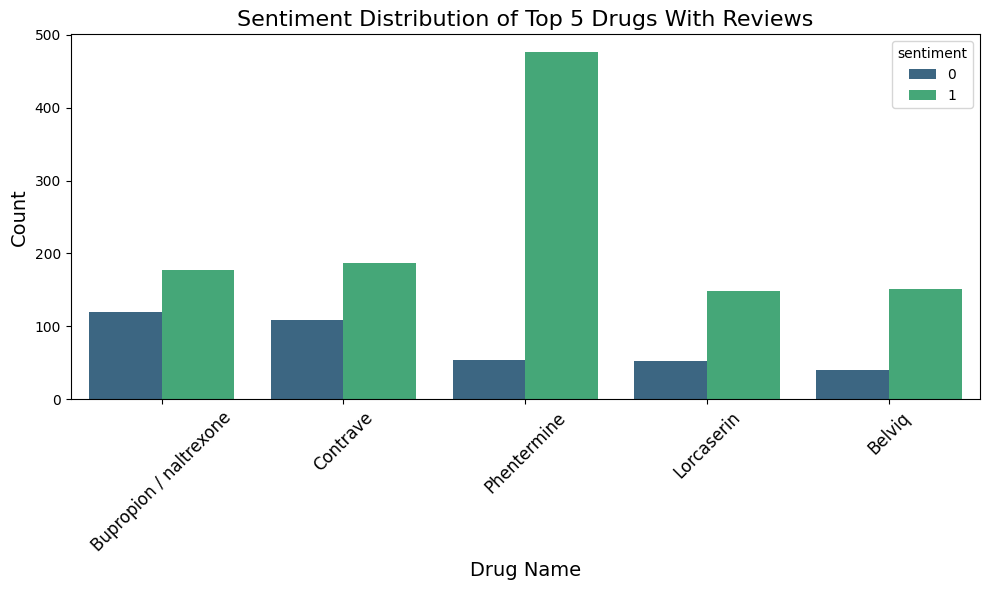

In [31]:
sentiment_count_per_drug = weightloss_data.groupby(['drugName', 'sentiment']).size().reset_index(name='count')

top_negative = sentiment_count_per_drug[sentiment_count_per_drug['sentiment'] == 0].nlargest(5, 'count')
top_positive = sentiment_count_per_drug[sentiment_count_per_drug['sentiment'] == 1].nlargest(5, 'count')

top_drugs = pd.concat([top_negative, top_positive])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_drugs, x='drugName', y='count', hue='sentiment', palette='viridis')
plt.title('Sentiment Distribution of Top 5 Drugs With Reviews', fontsize=16)
plt.xlabel('Drug Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

In [32]:
vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(weightloss_data['review'])

model = KMeans(n_clusters=2, max_iter=200, n_init=10)
model.fit(X)

weightloss_cl = pd.DataFrame(list(zip(weightloss_data['review'], model.labels_)), columns=['review', 'cluster'])
weightloss_cl

,review,cluster
0,Contrave combines drugs that were used for alc...,1
1,This is a waste of money. Did not curb my app...,0
2,Started out yesterday at 242 and this morning ...,1
3,I absolutely LOVE this medicine. I lost 30 pou...,0
4,I am 60 yo male starting weight 297lbs. Since ...,0
...,...,...
2432,"lst 4 weeks lost 10lbs, so happy. 5th week not...",0
2433,I had been taking Belviq for 4 days and lost a...,0
2434,Woman of Cuban and Puerto Rican heritage 51 an...,0
2435,I have had the worst experience with this pill...,1


Cluster: 0


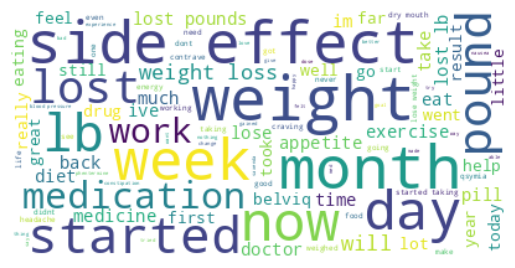

Cluster: 1


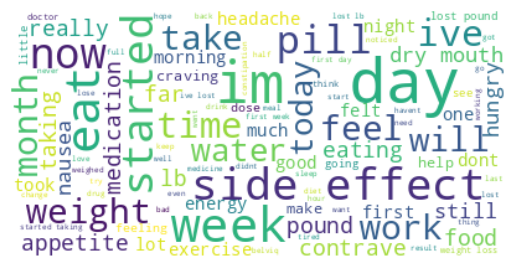

In [33]:
result=pd.DataFrame({'cluster':model.labels_,'rev':weightloss_data['review']})
for k in range(0,2):
   s=result[result.cluster==k]
   text=s['rev'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

### Classification of Ratings
The data contains 2437 rows and 8 features(including the sentiment column which we created).

Descriptive statistics reveal that the average rating for all weight loss medications is 7.83 showing that most reviews are positive, with a standard deviation of 2.91.

The ratings have been grouped into two distinct classes. Medications with ratings between 7 and 10 are classified as **Class 1** (positive sentiments), while those with ratings from 1 to 6 are categorized as **Class 0** (negative sentiments). The data shows a class imbalance, with 77% of the ratings belonging to **Class 1** and only 23% to **Class 0**. This imbalance could potentially impact the performance of prediction models. To address this, techniques such as weight balancing can be applied, and will help us observe the changes in model performance after applying these adjustments.

From the drug distribution analysis, Phentermine appears most frequently (531 reviews), followed by Bupropion/naltrexone (296) and Contrave (295), indicating these medications are commonly reviewed. Other drugs like Zantryl, Adipost, and Megace ES have minimal reviews,  suggesting potential data sparsity for certain medications. The sentiment distribution for the top five drugs reveals differences in customer feedback. For example, we can see that a large marjority of reviews for Phentermine is positive, this could mean that most people who use the drug have positive experienes.  Also, there is almost equal mix of positive and negative reviews for Buproprion and Contrave, reflecting mixed sentiments among users.

Cluster analysis was also performed on the review texts to group them into two clusters. Word clouds were generated for each cluster to visualize the frequent terms across the two clusters.

- **Cluster 0**: Common words like "weight loss" and "lost pounds" suggest that this cluster primarily represents medications used for obesity treatment.

- **Cluster 1**: Terms such as "appetite" and "hungry" imply that this cluster represents medications aimed at preventing weight loss.

Interestingly, terms like "started", "side effects" appear in both clusters, indicating that both types of medications may have associated side effects, which should be taken into consideration.

## 2.1 Sentiment Analysis

In [34]:
!pip install tensorflow==2.15.1
!python -m spacy download en_core_web_lg #code for pre-trained embedding
import tensorflow as tf
import spacy
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, LSTM, Conv1D, GlobalMaxPooling1D, Dropout, Activation, Input, TextVectorization, Embedding
from keras.callbacks import *
from keras.metrics import *
from keras.backend import clear_session
from keras.initializers import Constant
import en_core_web_lg #pre-trained
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [38]:
 #since deep learning models for binary classification predicts the '1' class, we want the negative class to have a value of 1.
 # So we need to change the sentiment column to convert rating values of 1-6 to 1 and 7-10 to 0.
 weightloss_data['sentiment'] = weightloss_data['rating'].replace({1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:0, 8:0, 9:0, 10:0})

In [37]:
X = weightloss_data['review']
y = weightloss_data['sentiment']

# splitting 70/30 for train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=831)

**Building Deep Learning Classification Model With Pre-trained Embedding Layer**

In [39]:
nlp = en_core_web_lg.load()
Vectorizer = TextVectorization()

In [40]:
Vectorizer.adapt(X_train.to_numpy())
vocab = Vectorizer.get_vocabulary()

num_tokens = len(vocab)
embedding_dim = len(nlp('The').vector)
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for i, word in enumerate(vocab):
    embedding_matrix[i] = nlp(str(word)).vector

Embedding_layer=Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=Constant(embedding_matrix),
    trainable=False)

In [41]:
METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'),
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
      AUC(name='prc', curve='PR'), # precision-recall curve
]

In [42]:
clear_session()

model = Sequential()
model.add(Input(shape=(1,), dtype=tf.string))


model.add(Vectorizer)
model.add(Embedding_layer)

model.add(LSTM(128,return_sequences=True,dropout=0.2))

model.add(GlobalMaxPooling1D())


model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=METRICS)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)
mc=ModelCheckpoint('best_model2', monitor='val_loss', mode='min', save_best_only=True, save_weights_only=False, verbose=1)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, None)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, None, 300)         2103000   
                                                                 
 lstm (LSTM)                 (None, None, 128)         219648    
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [43]:
history = model.fit(X_train,y_train,batch_size=128,epochs=10,
                    validation_data=(X_test,y_test),verbose=1,callbacks=[es,mc])

Epoch 1/10
14/14 [==============================] - ETA: 0s - loss: 0.5516 - tp: 26.0000 - fp: 48.0000 - tn: 1259.0000 - fn: 372.0000 - accuracy: 0.7537 - precision: 0.3514 - recall: 0.0653 - auc: 0.5530 - prc: 0.2714
Epoch 1: val_loss improved from inf to 0.49928, saving model to best_model2
14/14 [==============================] - 49s 3s/step - loss: 0.5516 - tp: 26.0000 - fp: 48.0000 - tn: 1259.0000 - fn: 372.0000 - accuracy: 0.7537 - precision: 0.3514 - recall: 0.0653 - auc: 0.5530 - prc: 0.2714 - val_loss: 0.4993 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 570.0000 - val_fn: 161.0000 - val_accuracy: 0.7801 - val_precision: 1.0000 - val_recall: 0.0062 - val_auc: 0.7347 - val_prc: 0.4157
Epoch 2/10
14/14 [==============================] - ETA: 0s - loss: 0.5055 - tp: 11.0000 - fp: 9.0000 - tn: 1298.0000 - fn: 387.0000 - accuracy: 0.7677 - precision: 0.5500 - recall: 0.0276 - auc: 0.7173 - prc: 0.4336
Epoch 2: val_loss improved from 0.49928 to 0.47534, saving model to best_model2

**Building Logistic Regression, Support Vector Machine, AdaBoost, Random Forest and Decision Tree Classification Models**

In [46]:
names = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "AdaBoost"]

classifiers = [LogisticRegression(class_weight='balanced', random_state=321),
               SVC(probability=True, class_weight='balanced', random_state=321),
               DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=321),
               RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10, random_state=321),
               AdaBoostClassifier(random_state=321),

               ]

## 2.2 Model Evaluation

In [47]:
# evaluating deep learning model on both training and testing data to obtain both performance and goodness of fit.
model_results_train = model.evaluate(X_train, y_train, batch_size=128, verbose=0)

print("\nTrain Results:")
for name, value in zip(model.metrics_names, model_results_train):
  print(name, ': ', value)

model_results_test = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

print("\nTest Results:")
for name, value in zip(model.metrics_names, model_results_test):
  print(name, ': ', value)


Train Results:
loss :  0.24734005331993103
tp :  268.0
fp :  26.0
tn :  1281.0
fn :  130.0
accuracy :  0.9085044264793396
precision :  0.9115646481513977
recall :  0.6733668446540833
auc :  0.9482982754707336
prc :  0.8862565755844116

Test Results:
loss :  0.35507848858833313
tp :  80.0
fp :  30.0
tn :  540.0
fn :  82.0
accuracy :  0.8469945192337036
precision :  0.7272727489471436
recall :  0.4938271641731262
auc :  0.8640459179878235
prc :  0.7097669839859009


In [48]:
# evaluating LR, AdaBoost, SVM,  DT and RF models on both training and testing data
for name, clf in zip(names, classifiers):
  clf_pipe = Pipeline([
                    ('tfidf', TfidfVectorizer(stop_words='english', min_df=5)),
                    (name, clf),
                    ])

  clf_pipe.fit(X_train,y_train)

  pred_train = clf_pipe.predict(X_train)
  pred_prob_train = clf_pipe.predict_proba(X_train)[:, 1]

  pred_test = clf_pipe.predict(X_test)
  pred_prob_test = clf_pipe.predict_proba(X_test)[:, 1]

  fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
  precision_train, recall_train, thresholds_pr_train = precision_recall_curve(y_train, pred_train)

  fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
  precision_test, recall_test, thresholds_pr_test = precision_recall_curve(y_test, pred_test)

  print('\n\n', name, '\n\n')
  print(f"Train Results")
  print(classification_report(y_train, pred_train))
  print('Train ROC AUC: ', auc(fpr_train, tpr_train))
  print('Train Precision/Recall AUC: ', auc(precision_train, recall_train))
  print('\n\n')

  print(f"Test Results")
  print(classification_report(y_test, pred_test))
  print('Test ROC AUC: ', auc(fpr_test, tpr_test))
  print('Test Precision/Recall AUC: ', auc(precision_test, recall_test))
  print('\n\n')



 Logistic Regression 


Train Results
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1307
           1       0.76      0.93      0.84       398

    accuracy                           0.92      1705
   macro avg       0.87      0.92      0.89      1705
weighted avg       0.93      0.92      0.92      1705

Train ROC AUC:  0.9766064446178867
Train Precision/Recall AUC:  0.6218983299636914



Test Results
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       570
           1       0.61      0.72      0.66       162

    accuracy                           0.84       732
   macro avg       0.76      0.80      0.78       732
weighted avg       0.85      0.84      0.84       732

Test ROC AUC:  0.8661143599740091
Test Precision/Recall AUC:  0.4768200631323969





 SVM 


Train Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00 

**Comparing the goodness of fit and performance for each of the classification models.**

For the **Deep** **Learning** **model**, a high precision score of 0.97 and AUC score of 0.95 indicates that the model fits well on training data. It also achieves a recall of 0.49 on the training data, meaning it struggles to identify positive cases (negative reviews). This model achieves an accuracy of 0.85 and AUC of 0.87 on the test data which indicate good generalization. Even though the deep learning model achieves a competitive AUC, precision accuracy curve, accuracy and precision scores, it still scores low on recall suggesting that the model may not be effective when we want to detect negative reviews.

The **Logistic** **Regression** **model** achieved an accuracy of 0.92, AUC of 0.98, recall of 0.93, precision of 0.76 showing it has a good fit and robust performance on training data and also indicates that the model captures positive cases (negative reviews) effectively. On the test data, there is an accuracy of 0.84, AUC of 0.87, precision of 0.61 and recall of 0.72 which suggests strong generalization and acceptable balance between precision and recall.

The **Support** **Vector** **Machine** has excellent performance on training data with a perfect score of 1 on metrics like AUC, accuracy, recall, indicating overfitting. On the test data, AUC is 0.89 and accuracy is 0.87 which suggests moderate generalization but recall is 0.57, highlighting its struggle in detecting negative review (class 1).

The **Decision** **Tree** **model** underperforms compared to other models, both in fit and generalization with accuracy of 0.69, precision of 0.41 and AUC of 0.77 on training data. A Recall of 0.79 shows the model captures positive cases but at the expense of precision. It also has poor generalization on the test data with an accuracy of 0.64, AUC of 0.69, precision recall AUC of  0.32 and F1 score of 0.45.

The **Random** **Forest** **model** has a moderate fit on training data with accuracy of 0.71 and AUC of 0.86. It has a higher recall of 0.87 which is better than its precision, but overall performance is weak compared to models like Logistic Regression.

**AdaBoost**, with an accuracy of 0.87 and AUC 0.93 indicates good fit on training data but shows a moderate ability to capture positive cases compared to the other models.

Based on the understanding of the business problem (which is identifying reviews that are negative) and comparing the goodness of fit and performance of each of the classification models, **Logistic** **Regression** **model** appears to be the preferred model because aside being computationally efficient and interpretable compared to models like Deep Learning, SVM, and ensemble methods, it achieves competitive performance on both training and test data with strong accuracy, recall and AUC  on the test set. It also avoids overfitting and performs consistently across datasets, which is not the case for the SVM and Random Forest models.








### **Summary of Problem Statement and Data**
The project addresses the challenge of predicting customer satisfaction ratings and identifying negative reviews for weight loss medications to guide pharmaceutical companies, healthcare providers, and customers in making informed decisions. Customer satisfaction, as indicated by reviews and accompanying ratings is very important for product improvement and prescription accuracy. The data contains 2437 rows and 8 features(including the created sentiment column).

Descriptive statistics reveal that the average rating for all weight loss medications is 7.83 showing that most reviews are positive, with a standard deviation of 2.91. In order to build the models, the ratings were grouped into two distinct classes(this was changed so that medications with ratings between 7 and 10 are classified as Class 0 (positive sentiments), while those with ratings from 1 to 6 are categorized as Class 1 (negative sentiments) because a deep learning model only predicts the positive class).

Data preprocessing involved addressing missing values, cleaning textual data, and standardizing date formats. Reviews were analyzed for key terms using a word cloud, revealing insights into common terms like "side effects".

### **Analysis and Findings**
The anlysis revealed that Phentermine has the most reviews, followed by Bupropion/naltrexone and Contrave. Other drugs like Zantryl, Adipost, and Megace ES have minimal reviews, suggesting potential data sparsity for certain medications.

The sentiment distribution for the top five drugs reveals differences in customer feedback; a large marjority of reviews for Phentermine is positive, this could mean that most people who use the drug have positive experienes.

Cluster analysis was also performed on the review texts. Both clusters had similar words like "started", "side effects" reflecting associated side effects.

Various classification models were then evaluated to predict negative reviews. The Logistic Regression model chieved strong generalization and a good balance between precision and recall on test data, making it a reliable choice for detecting negative reviews. Deep Learning model performed well on AUC and accuracy but struggled with recall on negative reviews, making it less effective for this business need. Support Vector Machine showed overfitting on training data and moderate generalization on test data but lacked robust recall for detecting negative reviews. The Decision Tree model also underperformed across all metrics, indicating that it is not suitable for this task. The Random Forest and AdaBoost models demonstrated moderate performance but were not chosen over the Logistic Regression model because it is not consistent and cannot be relied on. Overall, the Logistic Regression model emerged as the most effective model which is also easy to interprete and achieves competitive performance across metrics like accuracy, recall, and AUC.



### **Business Recommendations**
Based on the analysis and results, the Logistic Regression Model is recommended be used to monitor and predict negative reviews. Even though customer reviews are subjective and may not reflect the full efficacy or safety of a medication, this model potentially provides a baseline for pharmaceutical companies to address recurring issues, optimize drug development, and improve customer experiences by leveraging predictions from this model to address common pain points like side effects and provide clearer usage guidelines for medications.

There is also the potential of integrating this model into consumer platforms or health apps to highlight potential concerns with specific medications, so that users can make more informed decisions on which drugs to purchase. Moreover, this model can be integrated into tools or platforms to support healthcare providers by summarizing customer experiences, thereby enabling them to make prescriptions based on patients' unique needs.



### **Limitations, Constraints And Privacy/Ethical Concerns**
While the proposed model offers valuable insights that can be leveraged by personal users, healthcare professionals and pharmaceutical companies, its implementation is subject to several limitations, constraints, and ethical concerns. The model's predictions are based on subjective customer reviews, which may not always be accurate, representative, or free from bias. Also, drug reactions and side effects depends on individual health conditions and genetic factors, which limits the model's generalizability since the lack of comprehensive and balanced data could skew the results, leading to potentially flawed recommendations. From a privacy perspective, handling sensitive health-related data necessitates strict compliance with regulations, ensuring that customer data is anonymized and protected from unauthorized access.

There is also a risk of misinterpretation or over-reliance on predictions without adequate clinical evidence, which can raise ethical concerns. Furthermore, pharmaceutical companies must guard against any unintended bias in the model that could disproportionately impact vulnerable populations. Addressing these concerns is necessary to ensure a responsible and effective deployment of the model to solve the business problem.